In [ ]:
#Загружаем данные из google drive
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
df = pd.read_excel('/content/drive/My Drive/scoring case.xlsx')
df

Mounted at /content/drive


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,NaN,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,NaN,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,107922,NaN,Cash loans,F,N,Y,0,112500.0,728460.0,40806.0,675000.0,Family,Pensioner,Secondary / secondary special,Widow,House / apartment,0.018634,-22753,365243,-12195,-4297,NaN,1,0,0,1,0,0,NaN,1,2,2,THURSDAY,19,0,0,0,0,0,0,...,0.1231,0.1537,0.0000,0.0000,org

In [ ]:
#смотрим размерность массива
df.shape

(6797, 122)

In [ ]:
#удаляем столбец с ID клиентов
del df["SK_ID_CURR"]

In [ ]:
#смотрем количество пропущенных значений в каждом столбце
pd.set_option('display.max_rows', 500)
na_sum=df.isna().sum()
na_sum[na_sum>0]

TARGET                          1000
AMT_GOODS_PRICE                    4
NAME_TYPE_SUITE                   28
OWN_CAR_AGE                     4503
OCCUPATION_TYPE                 2094
EXT_SOURCE_1                    3831
EXT_SOURCE_2                      19
EXT_SOURCE_3                    1323
APARTMENTS_AVG                  3426
BASEMENTAREA_AVG                3950
YEARS_BEGINEXPLUATATION_AVG     3296
YEARS_BUILD_AVG                 4492
COMMONAREA_AVG                  4719
ELEVATORS_AVG                   3581
ENTRANCES_AVG                   3383
FLOORSMAX_AVG                   3338
FLOORSMIN_AVG                   4589
LANDAREA_AVG                    3999
LIVINGAPARTMENTS_AVG            4631
LIVINGAREA_AVG                  3384
NONLIVINGAPARTMENTS_AVG         4703
NONLIVINGAREA_AVG               3692
APARTMENTS_MODE                 3426
BASEMENTAREA_MODE               3950
YEARS_BEGINEXPLUATATION_MODE    3296
YEARS_BUILD_MODE                4492
COMMONAREA_MODE                 4719
E

In [ ]:
na_sum.index

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


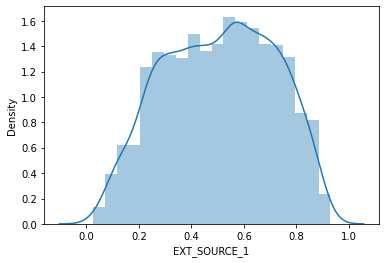

In [ ]:
#просто решил посмотреть распределение EXT_SOURCE_1
EXT_SOURCE_1=df["EXT_SOURCE_1"].dropna()
import seaborn as sns
sns.distplot(EXT_SOURCE_1)

In [ ]:
#код для удаления столбцов, где больше n% пропусков, но оказалось, что лучше оставить все столбцы
for i in range(len(na_sum)):
  if na_sum[i]>=df.shape[0]*1.0:
    del df[na_sum.index[i]]

In [ ]:
#смотрим, как изменилась размерность
df.shape

(6797, 121)

In [ ]:
#Заполняем строковые данные с пропусками (только 1 столбец, смотрим, какое самое встречаемое значение)
df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      5498
Family              897
Spouse, partner     255
Children             63
Other_B              36
Other_A              14
Group of people       6
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
#проверил, совпадает ли количество строк этого столбца с начальной таблицей
sum(df["NAME_TYPE_SUITE"].value_counts())==df.shape[0]

False

In [ ]:
df["NAME_TYPE_SUITE"]=df["NAME_TYPE_SUITE"].fillna("Unaccompanied")

In [ ]:
#и при заполнении пропусков
sum(df["NAME_TYPE_SUITE"].value_counts())==df.shape[0]

True

In [ ]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,NaN,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,NaN,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,NaN,Cash loans,F,N,Y,0,112500.0,728460.0,40806.0,675000.0,Family,Pensioner,Secondary / secondary special,Widow,House / apartment,0.018634,-22753,365243,-12195,-4297,NaN,1,0,0,1,0,0,NaN,1,2,2,THURSDAY,19,0,0,0,0,0

In [ ]:
#заморочка с тем, чтобы заполнить остальные данные (приводил к одному типу), у целочисленных данных и строковых вставлял моду, у данных типа float - медиану
type(df.iloc[0,0])

numpy.float64

In [ ]:
df["TARGET"].fillna(np.float64(df.mode().dropna().iloc[:,0]))

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6792    0.0
6793    0.0
6794    0.0
6795    0.0
6796    0.0
Name: TARGET, Length: 6797, dtype: float64

In [ ]:
moda=df.mode().dropna()

In [ ]:
type(moda.iloc[0,1])

str

In [ ]:
for i in df.columns:
  if type(df[i][0])!=np.float64:
    tip=type(df[i][0])
    df[i]=df[i].fillna(tip(moda[i][0]))
df=df.fillna(df.mean())

In [ ]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1.000000,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,11.792938,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,...,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000000,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,11.792938,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,...,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.0,0.0,1.0,0.0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.000000,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,...,0.101249,0.110161,0.008295,0.028262,reg oper account,block of flats,0.102605,Panel,No,0.0,0.0,0.0,0.0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,11.792938,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,...,0.101249,0.110161,0.008295,0.028262,reg oper account,block of flats,0.102605,Panel,No,2.0,0.0,2.0,0.0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.007965,0.008473,0.035248,0.270124,0.270802,1.871717
4,0.000000,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,11.792938,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,...,0.101249,0.110161,0.008295,0.028262,reg oper account,block of flats,0.102605,Panel,No,0.0,0.0,0.0,0.0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
#проверил, все ли столбцы заполнены
df.isna().sum()

TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

In [ ]:
#вывожу номера столбцов, где строки
stroki=[]
for i in range(len(df.iloc[0])):
  if type(df.iloc[0,i])==str:
    stroki.append(i)
stroki

[1, 2, 3, 4, 10, 11, 12, 13, 14, 27, 31, 39, 85, 86, 88, 89]

In [ ]:
#решил проверить, как работают дамми переменные в пандасе
abcd=pd.DataFrame([[1,"b","c"],[2,"e","f"]])
abcd

,0,1,2
0,1,b,c
1,2,e,f


In [ ]:
pd.get_dummies(abcd)

,0,1_b,1_e,2_c,2_f
0,1,1,0,1,0
1,2,0,1,0,1


In [ ]:
#закодировал все строковые данные в дамми переменные, смотрю, как изменилась размерность таблицы
df=pd.get_dummies(df)
df.shape

(6797, 240)

In [ ]:
#делаю датафрейм без NAN
data=df.iloc[:df.shape[0]-1000]
df.iloc[df.shape[0]-1000:,0]=np.nan
data

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648,-2120,11.792938,1,1,0,1,1,0,1,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.02470,0.036900,0.97220,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
1,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186,-291,11.792938,1,1,0,1,1,0,2,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.511949,0.09590,0.052900,0.98510,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260,-2531,26.000000,1,1,1,1,1,0,1,2,2,9,0,0,0,0,0,0,0.505888,0.555912,0.729567,0.11872,0.089705,0.97846,0.751621,0.044864,0.078389,0.151073,0.226964,0.232947,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833,-2437,11.792938,1,1,0,1,0,0,2,2,2,17,0,0,0,0,0,0,0.505888,0.650442,0.511949,0.11872,0.089705,0.97846,0.751621,0.044864,0.078389,0.151073,0.226964,0.232947,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311,-3458,11.792938,1,1,0,1,0,0,1,2,2,11,0,0,0,0,1,1,0.505888,0.322738,0.511949,0.11872,0.089705,0.97846,0.751621,0.044864,0.078389,0.151073,0.226964,0.232947,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,0.0,0,270000.0,450000.0,30204.0,450000.0,0.028663,-23768,365243,-2216,-2485,3.000000,1,0,0,1,0,0,2,2,2,9,0,0,0,0,0,0,0.505888,0.693567,0.553165,0.11872,0.089705,0.97846,0.751621,0.044864,0.078389,0.151073,0.226964,0.232947,...,0,0,0,

In [ ]:
df

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648,-2120,11.792938,1,1,0,1,1,0,1,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.02470,0.036900,0.97220,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
1,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186,-291,11.792938,1,1,0,1,1,0,2,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.511949,0.09590,0.052900,0.98510,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260,-2531,26.000000,1,1,1,1,1,0,1,2,2,9,0,0,0,0,0,0,0.505888,0.555912,0.729567,0.11872,0.089705,0.97846,0.751621,0.044864,0.078389,0.151073,0.226964,0.232947,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833,-2437,11.792938,1,1,0,1,0,0,2,2,2,17,0,0,0,0,0,0,0.505888,0.650442,0.511949,0.11872,0.089705,0.97846,0.751621,0.044864,0.078389,0.151073,0.226964,0.232947,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311,-3458,11.792938,1,1,0,1,0,0,1,2,2,11,0,0,0,0,1,1,0.505888,0.322738,0.511949,0.11872,0.089705,0.97846,0.751621,0.044864,0.078389,0.151073,0.226964,0.232947,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,NaN,0,112500.0,728460.0,40806.0,675000.0,0.018634,-22753,365243,-12195,-4297,11.792938,1,0,0,1,0,0,1,2,2,19,0,0,0,0,0,0,0.505888,0.565972,0.638044,0.14850,0.112200,0.98410,0.782400,0.070900,0.160000,0.137900,0.333300,0.041700,...,0,0

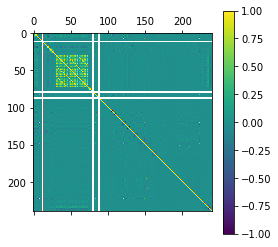

In [ ]:
#смотрю матрицу корреляций
import matplotlib.pyplot as plt
plt.matshow(data.corr())
plt.colorbar()

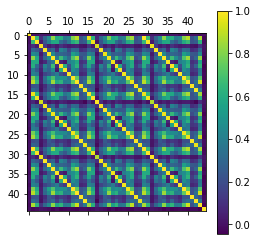

In [ ]:
#она же, но ближе
plt.matshow(data.iloc[:,30:75].corr())
plt.colorbar()

In [ ]:
#удаляю факторы с сильной корреляций между друг другом, чтобы избавиться от мультиколлинеарности
data=data.drop(columns=data.iloc[:,31:74].columns)

In [ ]:
#разбиваю датафрейм на У (первый столбец) и Х (все остальные)
from sklearn.model_selection import train_test_split
y=data.iloc[:,0].values
X=data.iloc[:,1:].values

In [ ]:
#обучаю модель на тренировочных данных и смотрю правильность (количество правильно предсказанных классов)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
rf=RandomForestClassifier(random_state=42, n_estimators=100, class_weight="balanced")
rf.fit(X_train,y_train)
print("Правильность на обучающем наборе: {:.5f}".format(rf.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.5f}".format(rf.score(X_test, y_test)))

Правильность на обучающем наборе: 1.00000
Правильность на тестовом наборе: 0.91517


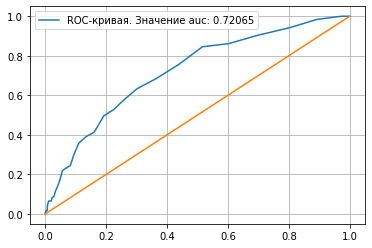

In [ ]:
#построение ROC-кривой и вычисляю ROC AUC (площадьт под графиком)
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,-1])
plt.plot(fpr, tpr, label="ROC-кривая. Значение auc: {:.5f}".format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,-1])))
plt.plot([0.0,1.0],[0.0,1.0])
plt.grid()
plt.legend()

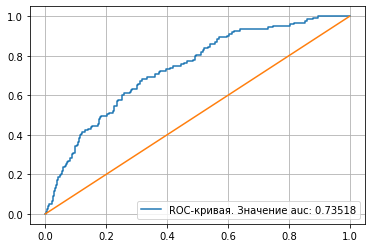

In [ ]:
#построение ROC-кривой и вычисляю ROC AUC (площадьт под графиком)
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gb.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC-кривая. Значение auc: {:.5f}".format(roc_auc_score(y_test, gb.decision_function(X_test))))
plt.plot([0.0,1.0],[0.0,1.0])
plt.grid()
plt.legend()

In [ ]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
np.bincount(np.int64(y_test))

array([1327,  123])

In [ ]:
y_test=np.float64([0]*(1327+122).append([1]))
y_test

AttributeError: ignored

In [ ]:
y_test=[0]*(1327+122)
y_test[-1]=1


1

In [ ]:
#значение перекрестной проверки (по всему датасету)
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(gb, X_train, y_train, cv=5)
print("Значения правильности перекрестной проверки на тренировочном набре: {:.5f}".format(scores_train.mean()))
scores_test = cross_val_score(gb, X_test, y_test, cv=5)
print("Значения правильности перекрестной проверки на тренировочном набре: {:.5f}".format(scores_test.mean()))

Значения правильности перекрестной проверки на тренировочном набре: 0.91879
Значения правильности перекрестной проверки на тренировочном набре: 0.90828


In [ ]:
#настройка параметров модели
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.1,max_depth=1,n_estimators=100,random_state=0)
gb.fit(X_train,y_train)
print("Правильность на обучающем наборе: {:.5f}".format(gb.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.5f}".format(gb.score(X_test, y_test)))

Правильность на обучающем наборе: 0.92616
Правильность на тестовом наборе: 0.91517


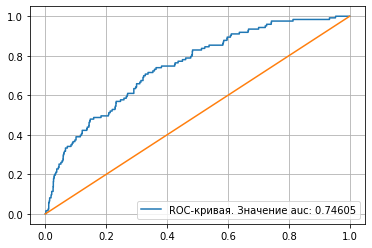

In [ ]:
#график с настроенными параметрами
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,-1])
plt.plot(fpr, tpr, label="ROC-кривая. Значение auc: {:.5f}".format(roc_auc_score(y_test, gb.predict_proba(X_test)[:,-1])))
plt.plot([0.0,1.0],[0.0,1.0])
plt.grid()
plt.legend()

In [ ]:
#перекрестная проверка с настроенными параметрами
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(gb, X_train, y_train, cv=5)
print("Значения правильности перекрестной проверки на тренировочном набре: {:.5f}".format(scores_train.mean()))
scores_test = cross_val_score(gb, X_test, y_test, cv=5)
print("Значения правильности перекрестной проверки на тестовом набре: {:.5f}".format(scores_test.mean()))

Значения правильности перекрестной проверки на тренировочном набре: 0.92455
Значения правильности перекрестной проверки на тестовом набре: 0.91655


In [ ]:
len(gb.feature_importances_)

196

In [ ]:
len(data.columns[1:])

196

In [ ]:
features=pd.DataFrame(data=gb.feature_importances_,index=data.columns[1:],columns=["Значения"])

In [ ]:
features_sorted=features.sort_values(by=["Значения"])[::-1][features.sort_values(by=["Значения"])[::-1]>0].dropna()

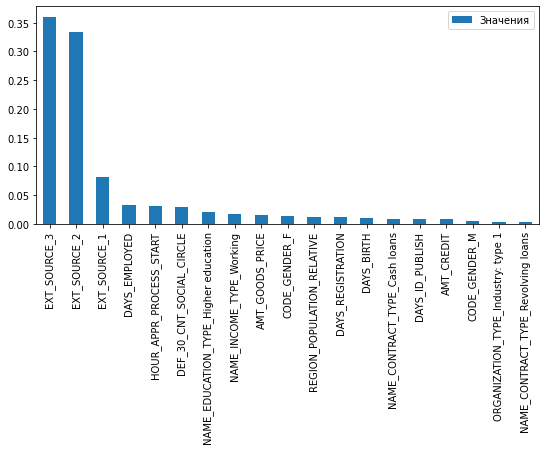

In [ ]:
#смотрю, какой вклад делает каждый фактор в модель
features_sorted.plot(kind="bar", figsize=(9,4))

In [ ]:
y=data.iloc[:,0].values
X=data.iloc[:,1:].values
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.1,max_depth=1,n_estimators=100,random_state=0)
gb.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
X_predict=df.iloc[-1000:]
X_predict=X_predict.drop(columns=X_predict.iloc[:,31:74].columns)
X_predict=X_predict.iloc[:,1:]
predicted=gb.predict_proba(X_predict)[:,:1]
pred=pd.DataFrame(predicted)

In [ ]:
scores_train = cross_val_score(gb, X, y, cv=5)
print("Значения правильности перекрестной проверки на тренировочном набре: {:.5f}".format(scores_train.mean()))

Значения правильности перекрестной проверки на тренировочном набре: 0.92220


In [ ]:
X_predict=df.iloc[-1000:]
X_predict=X_predict.drop(columns=X_predict.iloc[:,31:74].columns)
X_predict=X_predict.iloc[:,1:]
predicted=gb.predict_proba(X_predict)[:,:1]
pred=pd.DataFrame(predicted)
pred.to_excel("pred2.xlsx")
from google.colab import files
files.download("pred2.xlsx")